Under **Extra** here we ought to generalize the idea of a center of a simplex to the question 'where is the center of 
the regular tetrahedron... and what are the angles there?' This leads to Plateau.

### Friendly introduction 


This page features two items: Triangles in the wrong number of dimensions and a calculation
of $\pi$. 


As we discussed at the Other Math Club a triangle is two-dimensional; not three and not one. 
However we can ask the question 'what is *like* a triangle in other dimensions?' The easiest
place to start is in three dimensions since we can attach four triangles together to make 
a simple pyramid called a tetrahedron. *tetra* means four and *hedron* has something to do 
with a 'base'. 


So much for three dimensions... what about one dimension? The simplest shape in one
dimension is a little line segment so I suppose that's all there is to that. In zero
dimensions all we get is a point. So now we have zero, one, two, and three dimensional
versions of triangles... but we reserve the word *triangle* for two dimensions. 


What about four dimensions? Easy! The four-dimensional version of a triangle is called
the *pentachoron* and unfortunately we can't see it... but we can describe it and we can
see its shadow. We'll look into this a bit more below; but our main goal will be to
unify our two themes of triangles and circles by working with volumes in three dimensions.

Calculating $\pi$ requires some picture drawing and borrowing a little bit of advanced 
mathematics. The idea is simple enough and we ran into it before when we started doing
*construction*. It is this: 

Suppose with a compass and straight edge that you construct a circle and draw a triangle
around it. Then you draw a square around it. Then you draw a hexagon around it. If you
calculate the area of the circle you find it is the smallest of the four. In order the
triangle, the square and the hexagon make better and better approximations of the 
area of the circle. In the same sense the perimeter of the triangle, the square and 
the hexagon make better approximations of the perimeter of the circle. 


Now do the same thing with the figures drawn on the inside of the circle. Same result:
Inscribed triangle, square and hexagon give better and better approximations of the
area and perimeter of the circle. 


This suggests that we can continue to circumscribe and inscribe polygons around/in
the circle with more and more sides that gradually come to resemble the circle.
This is perhaps analogous to the way that Mister Halfway -- by taking ever smaller
steps -- has a position that is a better and better approximation of $1/3$. 


To make these approximations that get closer and closer let's introduce the idea
of an $n$-gon. This is a regular polygon with $n$ sides; so a $6-gon$ is actually
a hexagon, a $3-gon$ is an equilateral triangle and by now you realize that 
a square is a $4-gon$ conclusion. 


### Terms

- $n$-gon: A regular polgyon with $n$ equal sides and a single angle between all adjacent sides.


<br>${\Huge \infty}$


What is a common name for an $\infty$-gon? What is the single angle between all the 
adjacent sides of an $\infty$-gon? 


### Sticks and Triangles


*kilroy everything on sticks/triangles goes over to probability*


Suppose we come up with a way of identifying three sticks with particular lengths $a$, $b$, and $c$. 
Let's consider the question 'Can these three sticks be used to make a triangle?' Think for a moment about what
this means... can you write a mathematical requirement that is necessary to be able to make a triangle? 
(By *making a triangle* we mean the sticks touch end to end; there is no extra sticking out!)


Here is one way to write the mathematical condition needed for a triangle: 


Suppose $a$ is the longest of the three sticks. Of course $b$ and $c$ may have the same length as $a$ so we
can write $a \ge b$ and $a \ge c$. Then for a triangle to be possible we require $b+c>a$.


Let's call 'the probability that three sticks can make a triange' $P_\Delta$ for short. 


Now let's invent some stick rules with some randomness built in. The first two are from Martin Gardner's 
book **The Colossal Book Of Mathematics**. The third problem I may have seen somewhere but I forget where.
Here are all three problems so that you can think about them without having to go down further on this
page to find them.

1. Suppose you have a stick of length $1$ broken into three pieces: Two points are chosen at random
along the stick where it is cut to give three sticks. What is $P_\Delta$?

2. Suppose you have a stick of length $1$ broken into three pieces: First the stick is broken
at a randomly chosen point to produce two sticks. One of these sticks is chosen at random (50-50 chance)
and that stick is broken at a random point, resulting in three sticks in total. What is $P_\Delta$?

3. Suppose three sticks are produced each with random length between 0 and 1. What is $P_\Delta$?

Like other problems in probability we can resort to Monte Carlo methods in Python to answer these questions.
This has the advantage of avoiding solving the problem... or verifying an answer if we do come up with one.
The next three cells produce stastical answers for these three versions of the $P_\Delta$ problem, respectively.

In [4]:
################
##
## Three sticks = a triangle? Version 1: Choose two break points on the unit stick
##
number_of_trials = 100000
##
################

import random as r

number_of_triangles = 0

def Is_it_a_triangle(a, b, c):
    if a >= b and a >= c and b + c > a: return 1
    if b >= a and b >= c and a + c > b: return 1
    if c >= a and c >= b and a + b > c: return 1
    return 0

for trial in range(number_of_trials):
    
    # create the three sticks as random numbers between 0 and 1
    point_one = r.uniform(0.0, 1.0)
    point_two = r.uniform(0.0, 1.0)

    # order point_one and point_two so point_one is less than point_two
    if point_one > point_two:
        a = point_two
        b = point_one - point_two
        c = 1.0 - point_one
    else:
        a = point_one
        b = point_two - point_one
        c = 1.0 - point_two
    
    number_of_triangles += Is_it_a_triangle(a, b, c)

Pt = float(number_of_triangles) / float(number_of_trials)

print('P(triangle) =', Pt, 'in', number_of_trials, 'tries')
    

P(triangle) = 0.24782 in 100000 tries


In [5]:
################
##
## Three sticks = a triangle? Version 2: Break 1.0 into two sticks, then break one of those sticks
##
number_of_trials = 100000
##
################

import random as r

number_of_triangles = 0

def Is_it_a_triangle(a, b, c):
    if a >= b and a >= c and b + c > a: return 1
    if b >= a and b >= c and a + c > b: return 1
    if c >= a and c >= b and a + b > c: return 1
    return 0

for trial in range(number_of_trials):

    # Break the original length-1 stick into two sticks
    first_stick = r.uniform(0.0, 1.0)
    second_stick = 1.0 - first_stick

    # We choose stick 1 or stick 2 to break
    if r.randint(1,2) == 1:                   # chooses to break the first stick
        if first_stick > second_stick:        #   which can make a triangle only if first > second
            
            first_stick_break = r.uniform(0.0, first_stick)
            a = first_stick_break
            b = first_stick - first_stick_break
            c = second_stick

            number_of_triangles += Is_it_a_triangle(a, b, c)
                
    else:                                      # we chose to break the second stick
        if first_stick < second_stick:         #   which can make a triangle only if second > first
            
            # Swap the labels on the two sticks
            temp = first_stick                 # This makes the part that follows identical to the above
            first_stick = second_stick    
            second_stick = temp                
            
            first_stick_break = r.uniform(0.0, first_stick)
            a = first_stick_break
            b = first_stick - first_stick_break
            c = second_stick

            number_of_triangles += Is_it_a_triangle(a, b, c)

Pt = float(number_of_triangles) / float(number_of_trials)

print('P(triangle) =', Pt, 'in', number_of_trials, 'tries')
    

P(triangle) = 0.19057 in 100000 tries


In [7]:
################
##
## Three sticks = a triangle? Version 3: 3 sticks each of random length from 0 to 1
##
number_of_trials = 1000000
##
################

import random as r

number_of_triangles = 0

def Is_it_a_triangle(a, b, c):
    if a >= b and a >= c and b + c > a: return 1
    if b >= a and b >= c and a + c > b: return 1
    if c >= a and c >= b and a + b > c: return 1
    return 0

for trial in range(number_of_trials):
    
    # create the three sticks as random numbers between 0 and 1
    a = r.uniform(0.0, 1.0)
    b = r.uniform(0.0, 1.0)
    c = r.uniform(0.0, 1.0)
    
    number_of_triangles += Is_it_a_triangle(a, b, c)

Pt = float(number_of_triangles) / float(number_of_trials)

print('P(triangle) =', Pt, 'in', number_of_trials, 'tries')
    

P(triangle) = 0.501181 in 1000000 tries


### Calculating $\pi$ 


Elsewhere we used an infinite sum of fractions to approximate $\pi$. Now we have one more attempt that was
alluded to very early on in the **geometry** track, in fact on the first page under **circles**. This topic
is advanced so be prepared for a certain amount of mysteriosity.

Suppose you circumscribe a regular polygon $P$ around a circle $C$ -- and then you inscribe a regular polygon 
$Q$ inside the same circle. All three figures have both perimeter and area; and the circle is in between the
polygons for both. Let's focus in this case on the perimeters...


and so on



In both cases there will be a difference in area. Furthermore the perimetery of the circle will be
less 



Suppose you are interested in measuring the perimeter of a circle that has a radius of $1$ (the unit circle). 
We *know* this will be $2\pi$, about 6.28. But can we *calculate* that in some way? 


That is what we do here.
The math is technical so you may want to read or skim and then talk to us to dig deeper.


Imagine you use a compass to draw the circle centered on the origin. Now draw four inscribed lines to make a rotated 
square: From (1, 0) to (0, 1) to (-1, 0) to (0, -1) back to (1, 0). Each of these lines has a length of $\sqrt{2}$ 
from the pythagorean formula. This is a first estimate of the perimeter of the unit circle: $4 \cdot \sqrt{2}$ 
or about $5.657$. A low estimate as we would expect! Our square does not follow the curved perimeter of the circle
very well. Let's improve!


Here is the important idea for what follows: We can use this square to build another regular polygon inscribed in the
circle with twice as many sides: A closer approximation to the shape of the circle. We can keep on doing this many
times until our polygon looks a lot like the unit circle. Our approximation for the perimeter should get closer and 
closer to $2\pi$.


In creating these polygons the first vertex is always at (1, 0). The second vertex has coordinates $(c, \;s)$ based on 
the central angle subtended by each edge of the polygon. Once we know $c$ and $s$ we can calculate the distance to (1, 0) 
and multiply that distance by $n$, the number of vertices / edges in the polygon. That will be our estimate of the 
perimeter of the circle.


Each time we double the number of vertices $n$ we cut the subtended angle in half. Fortunately the new coordinates 
$(c_2, \;s_2)$ are easy to determine from $(c,\;s)$ using trigonometry rules. Let's calculate $\pi$ using a known 
value of cosine and the 'half angle' formula. This method has both a good and a bad aspect to it. The good aspect 
is that there is some circular reasoning involved, in particular we are calling the circumference of the unit 
circle $2\pi$ without much justification. On the positive side the calculation itself only involves square 
roots... so it is a $\pi$-free calculation that approximates $\pi$.


kilroy left off here


Suppose we know s = the arc-length from 1 to pi/4. Then pi is approximately this arc length times eight (because pi/4 fits into 2 * pi eight times. That is the circular reasoning bit. 


If we have a rule for getting cos (theta / 2) then we could get a slightly better estimate of pi by cutting pi/4 in half to get pi/8. Calculate that distance and multiply it by 16 because there are twice as many segments. What we are doing, you see, is inscribing polygons into the unit circle. Each polygon has twice the number of vertices as the previous one. The important equation is the cosine half-angle formula:

$$\cos\left(\frac{\theta}{2}\right)=\sqrt\frac{\cos\theta+1}{2}$$

We can take a recursive approach to this calculation. We can start at pi/4 and call that n=1. That is an octagon inscribed inside the unit circle. Then what is the improved calculation for pi using the half-angle pi/8? Call that n + 1. And then recurse to n + 2, n + 3, n + 4, ...

$$\cos\theta_{n+1}=\sqrt{\frac{\cos\theta_{n}+1}{2}}$$

where

$$\cos\theta_{1}=\frac{\sqrt{2}}{2}$$

and now here is the next estimate of pi: 
    
$$\pi_{n+1} = 2^{2+n}\cdot\sqrt{2-2\cos\theta_{n+1}}$$

(-1.0856793685728585,
 1.0993180651701362,
 -1.0962429423073368,
 1.0962429423073368)

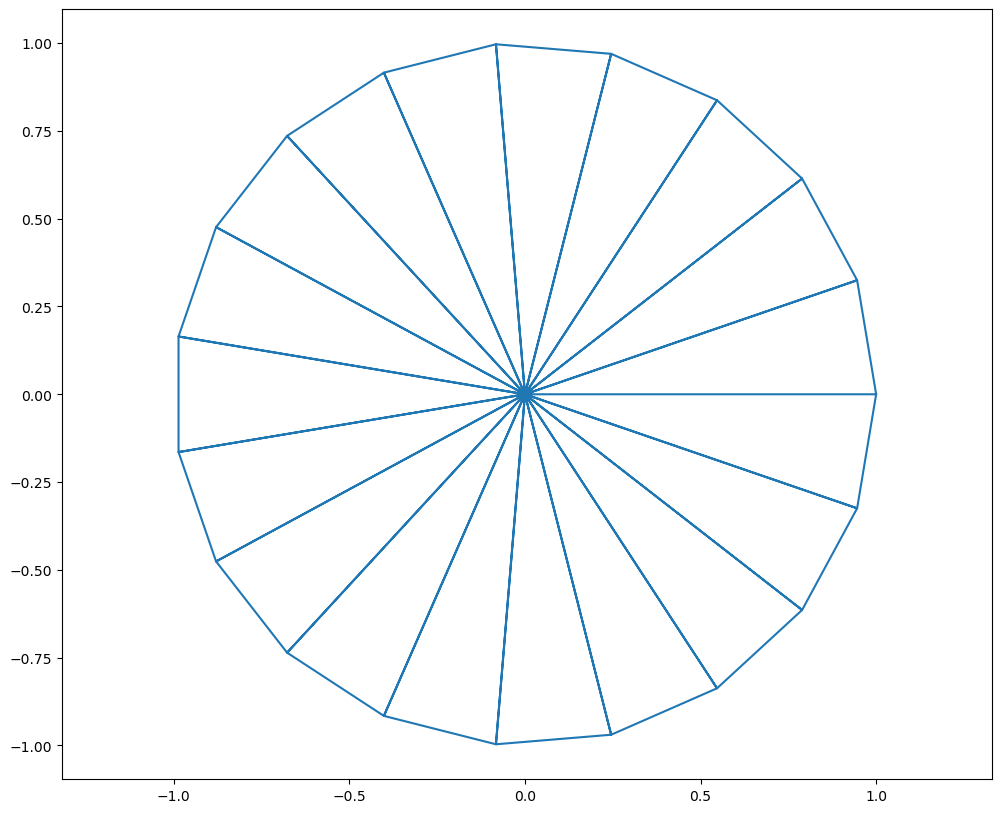

In [8]:
##################
##################
##
## Change n_polygon to affect the plot below
##
n_polygon = 19
##
##################
##################

# This block of code draws a regular polygon which approximates the unit circle

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
dtheta = np.pi*2.0/n_polygon
px = []
py = []
theta = 0.0
for i in range(n_polygon):
    px.append(0.0)
    py.append(0.0)
    px.append(np.cos(theta))
    py.append(np.sin(theta))
    px.append(np.cos(theta+dtheta))
    py.append(np.sin(theta+dtheta))
    theta += dtheta
fig, ax = plt.subplots(figsize=(12,10))
ax.plot(px, py)
ax.axis('equal')

pi is 3.141592653589793
0.019968957764878226
1.0045248555348174
0
1
2
3
4
even sum: 0.01996896
odd sum: 0.92483223
iteration 1 pi estimate 3.121445152258053
iteration 2 pi estimate 3.1365484905459406
iteration 3 pi estimate 3.140331156954739
iteration 4 pi estimate 3.141277250932757
iteration 5 pi estimate 3.1415138011441455


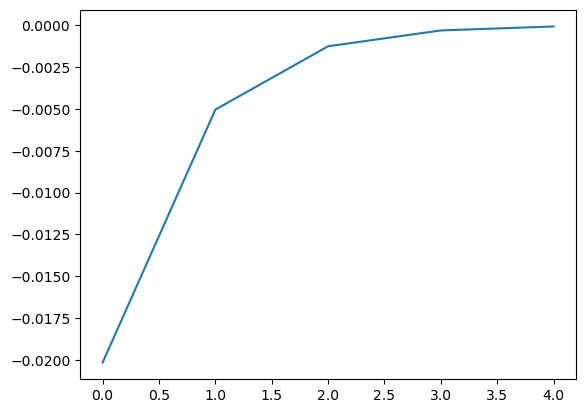

In [13]:
import numpy as np
pi = np.pi
print('pi is', pi)

# let's add up the even-numbered terms... 0, 2, 4... we hope they equal 0 
evenSum = 1 - pi*pi/8 + (pi*pi*pi*pi)/(2*2*2*2)/(4*3*2*1)
print(evenSum)

# let's add up the odd-numbered terms... 1, 3, 5... we hope they equal 1
oddSum = pi/2 - (pi*pi*pi)/48 + (pi*pi*pi*pi*pi)/(2*2*2*2*2)/120
print(oddSum)

def IsOdd(number):
    if number % 2 == 0: return False
    else: return True

def Factorial(number):
    if number == 0: return 1
    if number == 1: return 1
    if number > 1:
        factorial = 1
        for j in range(number):
            factorial = factorial * (j+1)
        return factorial

def Numerator(number, power):
    return np.power(number, power)

def ThisEvenTerm(x, term):
    termOverTwo = term/2
    if IsOdd(termOverTwo):
        thisSign = -1
    else:
        thisSign = 1
    return thisSign*Numerator(x, term)/Factorial(term)

def ThisOddTerm(x, term):
    termMinusOne = term - 1
    termMinusOneOverTwo = termMinusOne/2
    if IsOdd(termMinusOneOverTwo):
        thisSign = -1
    else:
        thisSign = 1
    return thisSign*Numerator(x, term)/Factorial(term)

##########
##
## make nTerms larger to improve accuracy of this estimate
##
nTerms = 5
##
##########

oddSum = 0.0
evenSum = 0.0
x = pi/2
for term in range(nTerms):
    print(term)
    if IsOdd(term):
        oddSum = oddSum + ThisOddTerm(x, term)
    else:
        evenSum = evenSum + ThisEvenTerm(x, term)

print('even sum:', round(evenSum, 8))
print('odd sum:', round(oddSum, 8))

import numpy as np

def next_cos_theta(cos_theta):
    return np.sqrt((cos_theta + 1.0)/2.0)

def next_pi(n, cos_theta):
    return np.power(2.0, 3.0 + n)*np.sqrt(2.0-2.0*cos_theta)


cos_theta_1 = np.sqrt(2.0)/2.0
ct = cos_theta_1
pi_est = []

for n in range(nTerms):
    nct = next_cos_theta(ct)
    nxtpi = next_pi(n, nct)
    print('iteration', n+1, 'pi estimate', nxtpi)
    pi_est.append(nxtpi)
    ct = nct
    


# This cell uses results from the cell above (pi_est): How well did we do?

# make plots inline (so that they do not pop-out)
%matplotlib inline

# get the plotting library going (this is how we make plots)
import matplotlib.pyplot as plt

# math library (this is how we do advanced mathematics using Python)
import numpy as np

# make a little plot going from 0 to 5 in steps of 0.01
pi_err = [x-np.pi for x in pi_est]
plt.plot(pi_err)

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *
from traitlets import dlink

def polynomial(x, a, n):
    sum = 0.0
    for p in range(n+1): sum += a[p]*np.power(x, p)
    return sum

def do_a_plot(n):
    data = []
    alpha = [1.0, -0.1, -0.01, -0.001, -0.0001, -0.00001]
    for i in range(100):
        x = (i*100) - 5000
        data.append(polynomial(x, alpha, n))
    plt.plot(data)
    return

interact(do_a_plot, n=widgets.IntSlider(min=0,max=5,step=1,value=0))

interactive(children=(IntSlider(value=0, description='n', max=5), Output()), _dom_classes=('widget-interact',)…

<function __main__.do_a_plot(n)>

### A problem about a point in a square


This is from the competition math club. Specifically from **AMC 10a 2011 Problem # 25** courtesy of Tristan.
The problem is challenging! I present it in its original language and then in a friendlier way.


**Original version of the problem** Let $R$ be a square region and $n >= 4$ an integer. A point $X$ in the interior of $R$ is called n-ray partitional if there are rays emanating from $X$ that divide $R$ into $n$ triangles of equal area. How many points are 100-ray partitional but not 60-ray partitional?


**Friendly version of the problem** Suppose you have a square (call it **R**) which is one unit on a side. We shall
place it on the xy-plane because we will need a coordinate system for what follows. Let's choose the point $X\;=\;(1/2,\; 1/2)$
which is in the center of the square; and let's draw four diagonals from $X$ to the four corners of the square. 


(kilroy image)


What we have done here is we have cut the square into four triangles that all have the same area. This is called 
a *partition* of the square **R**. Notice that we drew four rays and this gave us four partitions. We'll call
that a 4-partition. If we added four more lines out from $X$ to the centers of each side of the square we would
have an 8-partition. We could continue in this way to make other partitions. We could also relocate $X$ from
the center to somewhere else inside the square. 


Suppose you have some number $n$ that is 4 or larger: $n\;>=\;4$. A 
point $X$ is placed at some location inside the square (not necessarily at the center) 
in such a way that $n$ lines can be drawn outward from $X$ to the perimeter of the square
to make an $n$-partition. That is, all $n$ triangles have the same area. $X$ is 
called *n-ray partitional*.


Here at last is the question: 


How many 100-ray partitional points are *not* also 60-ray partitional points? 


**To make this more clear:** Take a point $X$ at (0.45, 0.62), inside the unit square. 
Suppose it is possible to draw $100$ lines from that point to the sides of the square that cut the 
square into triangles all with the same area. Then $X$ is a 100-ray partitional point.


Now suppose that the same point $X$ is *not* 60-ray partitional. Then $X$ counts. 
On the other hand we *can* partition the square into 60 equal-area triangles: 
Then $X$ *is* 60-ray partitional. It does *not* count towards the answer.


The problem is to count the number of such points inside the square. 


Whew!


### Solution

My original solution was 56. But I made a mistake. Tristan solved it. I tried to follow his reasoning and
in so doing I realized he was right and I had been in error. So I agree with his solution.


Here is the start of a solution...


Let's place the square $R$ at the origin in the first quadrant.


Place $(x,\;y)=X$ within $R$.


Draw rays from $X$ to the four corners dividing $R$ into four regions $A$, $B$, $C$ and $D$.
Those rays must be part of the solution; otherwise we would include corners in our partition
and those would not be triangles.


Count $a$ rays from $X$ to evenly spaced points along the bottom of $R$ not including the final diagonal to $(1,\;0)$.


Continue around counter-clockwise through regions $D$, $B$ and $C$ with ray counts $d$, $b$, $c$. Now if this 
is an $n$-ray partition then $a+b+c+d=n$. Furthermore all of the triangles must have the same area across
those four edges of $R$. 


Assert: The location of the coordinate $y$ is independent of the location of $x$. Why? 